In [16]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, concatenate_datasets
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np

load_dotenv(override=True)

True

In [17]:
%load_ext autoreload
%autoreload 2

from utils.preprocess_code import preprocess_js_code

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Token has not been saved to git credential helper.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.


In [19]:
dataset = load_dataset("aslam-naseer/js-function-complexity", split="all")


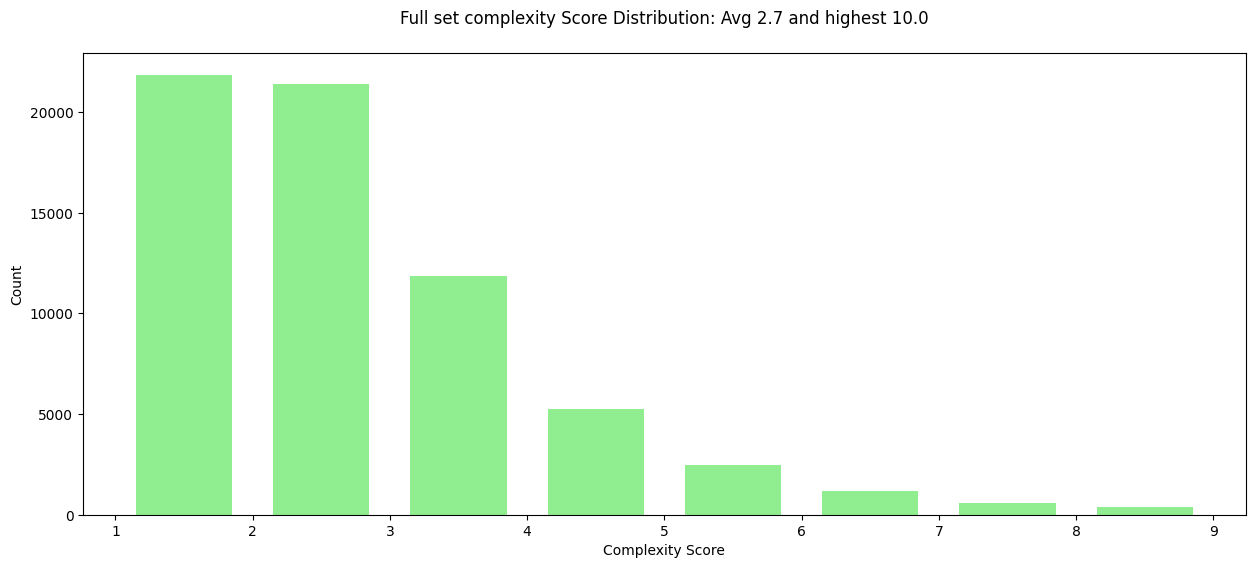

In [20]:
# Plot the distribution of complexity before splitting
scores = [example['complexity'] for example in dataset]


plt.figure(figsize=(15, 6))
plt.title(f"Full set complexity Score Distribution: Avg {sum(scores)/len(scores):,.1f} and highest {max(scores):,}\n")
plt.xlabel('Complexity Score')
plt.ylabel('Count')
plt.hist(scores, rwidth=0.7, color="lightgreen", bins=range(1,10))
plt.show()

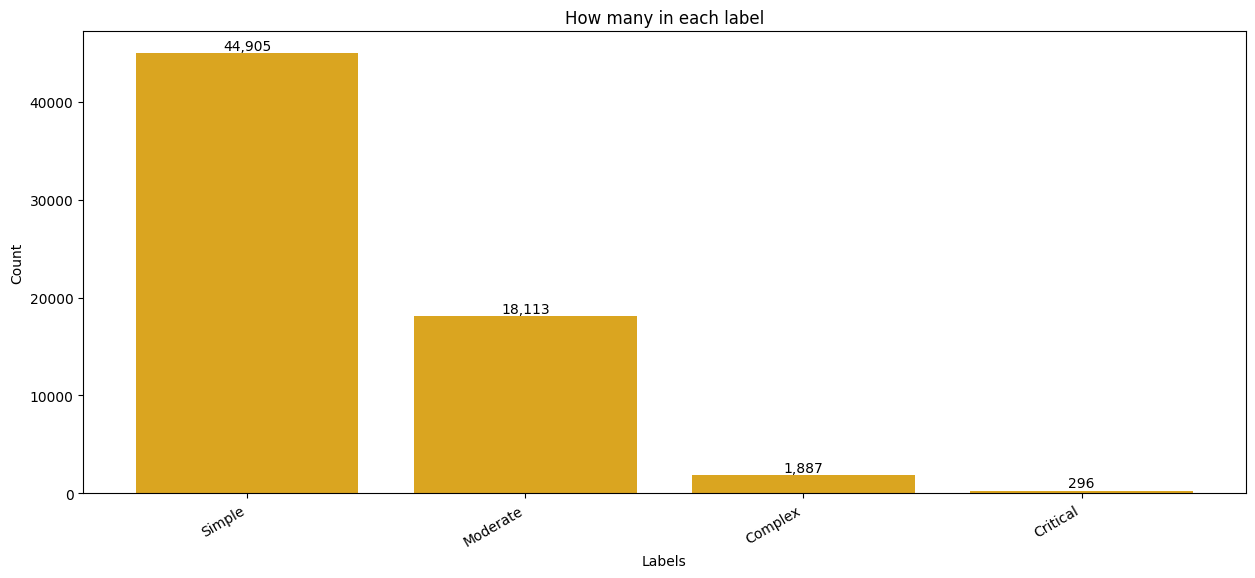

In [21]:
# Plot the distribution of labels before splitting
from collections import Counter

label_counts = Counter(dataset['label'])

labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

plt.figure(figsize=(15, 6))
plt.bar(labels, counts, color="goldenrod")
plt.title('How many in each label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

## Shrink dataset to necessary size

In [22]:
TRAIN_SIZE = 5000
VAL_SIZE = 500
TEST_SIZE = 500

In [43]:
np.random.seed(42)

SIZE = TRAIN_SIZE + VAL_SIZE + TEST_SIZE

complexities = np.array([fn["complexity"] for fn in dataset], dtype=float)
p = (complexities - complexities.min()) / (complexities.max() - complexities.min() + 1e-9)

w = np.where(p < 0.025, p, p**3)
w = w / w.sum()
idx = np.random.choice(len(dataset), size=SIZE, replace=False, p=w)
sample = [dataset[i] for i in idx]

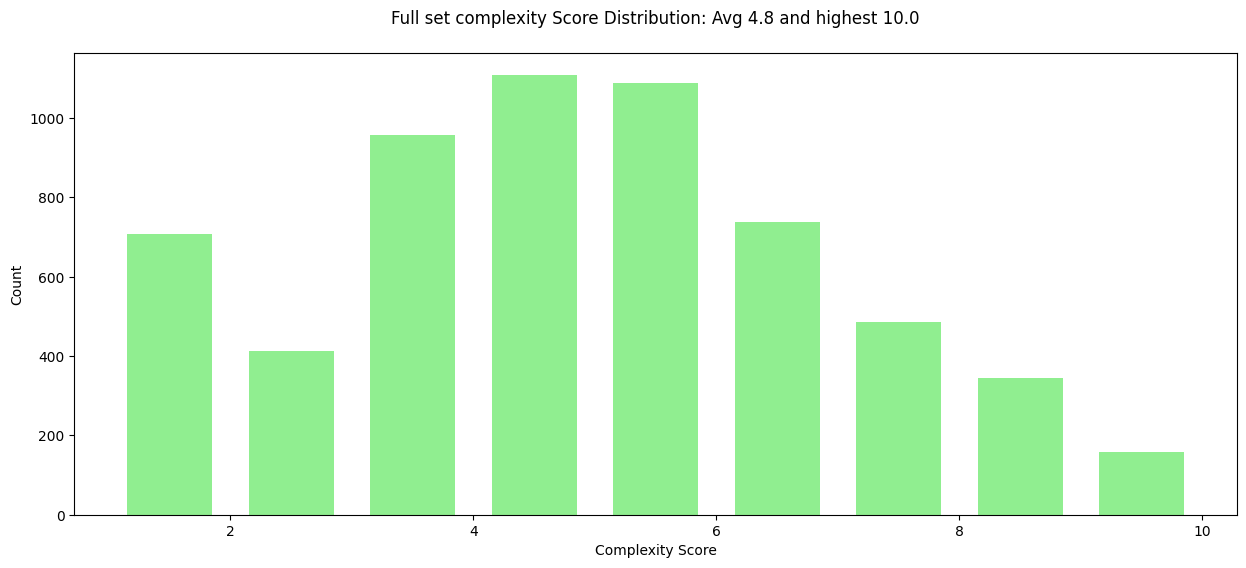

In [44]:
# Plot the distribution of complexity after splitting
scores = [example['complexity'] for example in sample]


plt.figure(figsize=(15, 6))
plt.title(f"Full set complexity Score Distribution: Avg {sum(scores)/len(scores):,.1f} and highest {max(scores):,}\n")
plt.xlabel('Complexity Score')
plt.ylabel('Count')
plt.hist(scores, rwidth=0.7, color="lightgreen", bins=range(1,11))
plt.show()

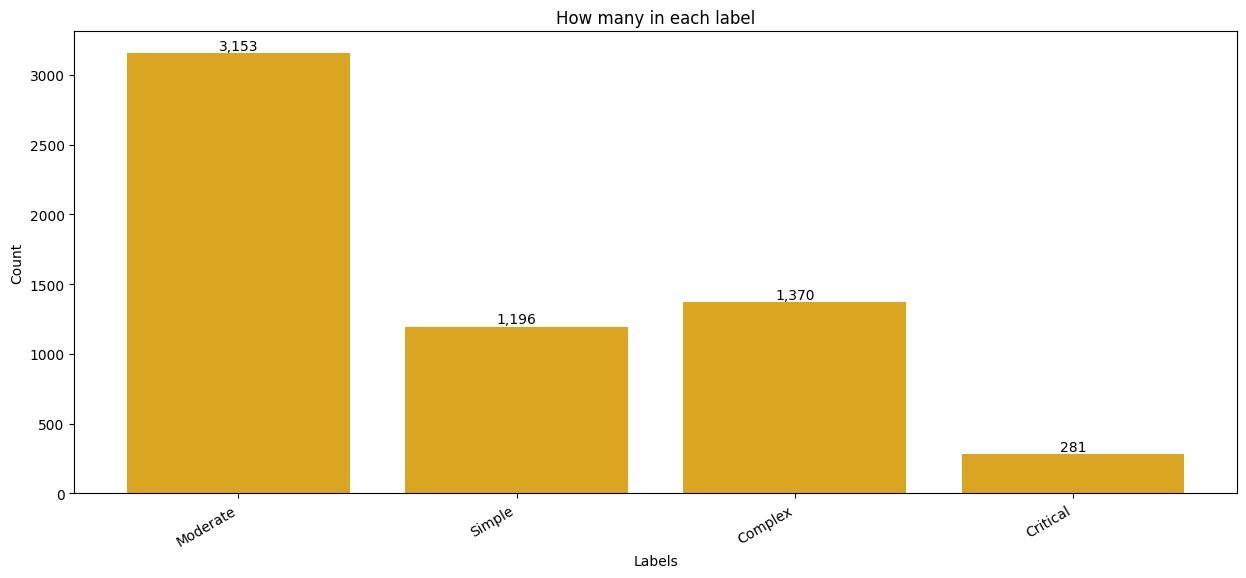

In [45]:
# Plot the distribution of labels after splitting
label_counts = Counter(fn['label'] for fn in sample)

labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

plt.figure(figsize=(15, 6))
plt.bar(labels, counts, color="goldenrod")
plt.title('How many in each label')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()

Final Sizes - Train: 5000, Test: 500, Val: 500


In [ ]:
# def process_item(example):
#     # This runs your existing function on the string
#     processed_code = preprocess_js_code(example)
#     return {
#         "processed_string": processed_code,
#         "length": len(processed_code)
#     }

# # Apply to your splits
# train_ds = train_ds.map(process_item)
# val_ds   = val_ds.map(process_item)
# test_ds  = test_ds.map(process_item)

In [ ]:
# print(train_ds[0])

{'repo': 'sociomantic-tsunami/nessie-ui', 'code': "function updateMarkup(nextMarkup) {\n      var prevChildren = this._renderedChildren;\n      // Remove any rendered children.\n      ReactChildReconciler.unmountChildren(prevChildren, false);\n      for (var name in prevChildren) {\n        if (prevChildren.hasOwnProperty(name)) {\n           true ?  false ? invariant(false, 'updateTextContent called on non-empty component.') : _prodInvariant('118') : void 0;\n        }\n      }\n      var updates = [makeSetMarkup(nextMarkup)];\n      processQueue(this, updates);\n    }", 'complexity': 3.4, 'label': 'Moderate', 'processed_string': "function updateMarkup(nextMarkup) { var prevChildren = this._renderedChildren; // Remove any rendered children. ReactChildReconciler.unmountChildren(prevChildren, false); for (var name in prevChildren) { if (prevChildren.hasOwnProperty(name)) { true ? false ? invariant(false, 'updateTextContent called on non-empty component.') : _prodInvariant('118') : void 

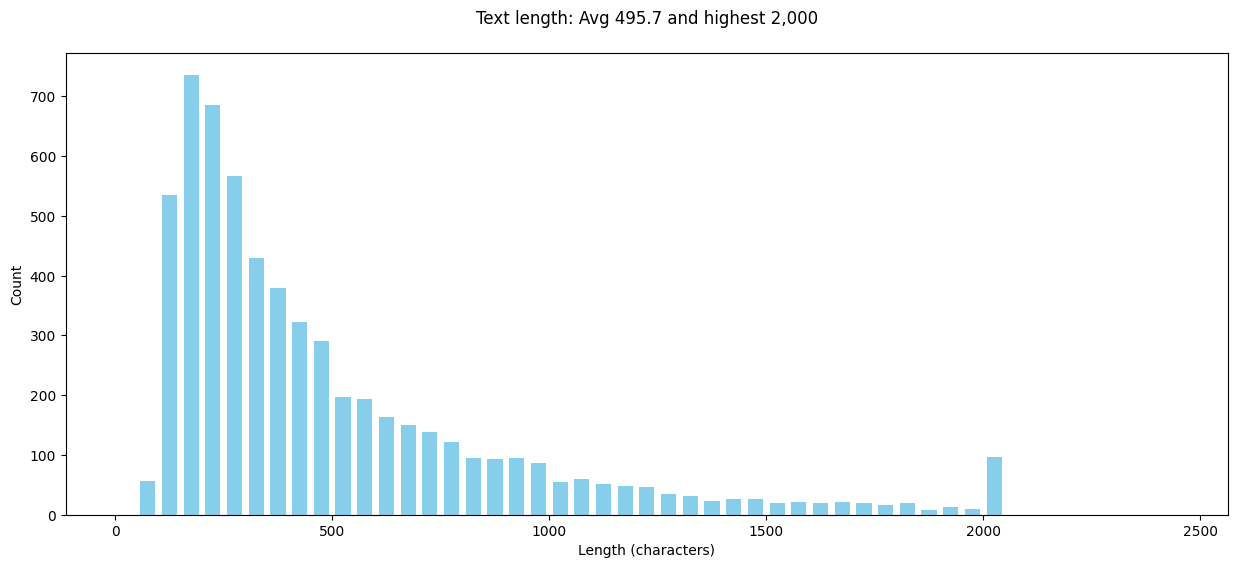

In [ ]:
# # Plot the distribution of lengths
# full_set = concatenate_datasets([train_ds, test_ds, val_ds])
# lengths = full_set["length"]

# plt.figure(figsize=(15, 6))
# plt.title(f"Text length: Avg {sum(lengths)/len(lengths):,.1f} and highest {max(lengths):,}\n")
# plt.xlabel('Length (characters)')
# plt.ylabel('Count')
# plt.hist(lengths, rwidth=0.7, color="skyblue", bins=range(0, 2500, 50))
# plt.show()

In [30]:
# from utils.fetch_api import fetch_features
# from utils.preprocess_code import convert_to_arrow

# code = dataset_dict["train"][0]["code"]
# code = convert_to_arrow(code)
# url = "https://lintelli-backend.onrender.com/lint"


# print(code)
# print()

# fetch_features(code, url)